# Market Basket Analysis 


Market basket analysis is a data mining technique used by retailers to increase sales by better understanding customer purchasing patterns. 

Types of market basket analysis
Retailers should understand the following types of market basket analysis:

* <b>Predictive market basket analysis.</b> This type considers items purchased in sequence to determine cross-sell.
* <b>Differential market basket analysis.</b> This type considers data across different stores, as well as purchases from different customer groups during different times of the day, month or year. If a rule holds in one dimension, such as store, time period or customer group, but does not hold in the others 

Reference: <a href = "https://www.techtarget.com/searchcustomerexperience/definition/market-basket-analysis#:~:text=Market%20basket%20analysis%20is%20a,likely%20to%20be%20purchased%20together.">techtarget</a> 

* <b>Support</b> indicates the frequency of the products being bought together. 
* Support = Number of transactions including both the products/Total number of transactions 
* <b>Confidence</b> indicates the direction for cross-selling
* Confidence of Product 1 = Support of basket/Support of product 1 
* Confidence of Product 2 = Support of basket/Support of product 2
* <b>Lift</b> indicates the strength of the relationhip between the products.
* LIFT = Support of basket/Support of product 1 * Support of product 2 

Reference: <a href = "https://www.youtube.com/watch?v=vK_njDjjP6I&t=2413s">here</a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mlxtend as ml
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [2]:
retail= pd.read_csv('../RFM_Analysis/retail_clean.csv')

In [3]:
retail.head(3)

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0


In [53]:
retail.shape

(779495, 10)

In [8]:
retail['Description'].value_counts().iloc[:10]

Description
WHITE HANGING HEART T-LIGHT HOLDER    5016
REGENCY CAKESTAND 3 TIER              3337
ASSORTED COLOUR BIRD ORNAMENT         2692
JUMBO BAG RED RETROSPOT               2641
PARTY BUNTING                         2099
LUNCH BAG  BLACK SKULL.               2045
REX CASH+CARRY JUMBO SHOPPER          1950
LUNCH BAG SPACEBOY DESIGN             1890
STRAWBERRY CERAMIC TRINKET BOX        1859
HOME BUILDING BLOCK WORD              1852
Name: count, dtype: int64

### Data Visualization

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(1, 0, 'REGENCY CAKESTAND 3 TIER'),
  Text(2, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(3, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(4, 0, 'PARTY BUNTING'),
  Text(5, 0, 'LUNCH BAG  BLACK SKULL.'),
  Text(6, 0, 'REX CASH+CARRY JUMBO SHOPPER'),
  Text(7, 0, 'LUNCH BAG SPACEBOY DESIGN '),
  Text(8, 0, 'STRAWBERRY CERAMIC TRINKET BOX'),
  Text(9, 0, 'HOME BUILDING BLOCK WORD')])

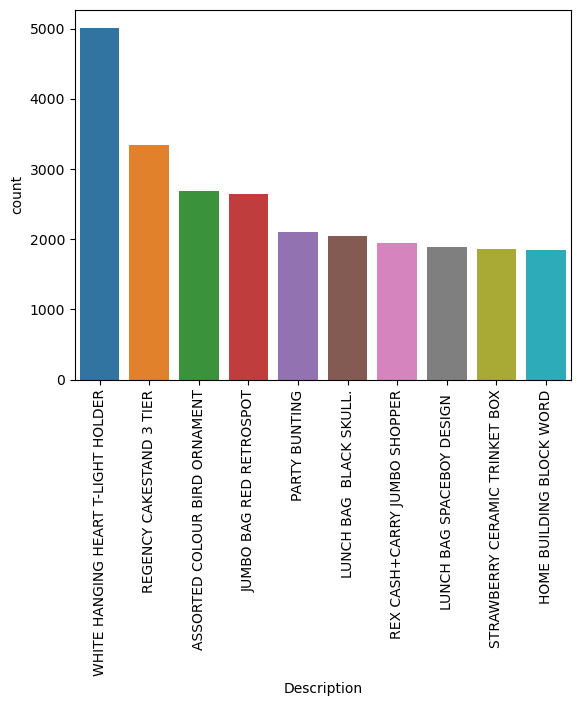

In [4]:
sns.countplot(x='Description',data= retail,order= retail['Description'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)

 ### How much orders are present ?

In [13]:
order_size = retail.groupby(['Invoice'])['Description'].count().reset_index()

In [14]:
order_size.describe()

,Invoice,Description
count,36975.000000,36975.000000
mean,536561.752265,21.081677
std,26580.252535,22.964145
min,489434.000000,1.000000
25%,513877.000000,6.000000
50%,536437.000000,15.000000
75%,559882.000000,27.000000
max,581587.000000,542.000000


-  There are outliers
- Average items in basket in 21 

<Axes: ylabel='Description'>

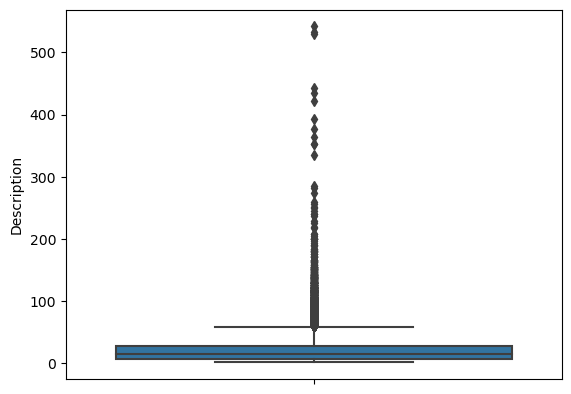

In [17]:
sns.boxplot(y='Description',data= order_size) 

- There are outliers, has b2b sales

In [18]:
invoice_desc_count= retail.groupby(['Invoice','Description']).size().reset_index(name='count')

In [21]:
invoice_desc_count.head(3)

,Invoice,Description,count
0,489434,WHITE CHERRY LIGHTS,1
1,489434,15CM CHRISTMAS GLASS BALL 20 LIGHTS,1
2,489434,FANCY FONT HOME SWEET HOME DOORMAT,1


##### Unstack the description

In [33]:
baskets= (invoice_desc_count.groupby(['Invoice','Description'])['count'].sum().unstack().reset_index().fillna(0).set_index('Invoice'))
baskets       

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [52]:
baskets.loc[489434][340:350]

Description
ASSTD DESIGN RACING CAR PEN            0.0
ASSTD FRUIT+FLOWERS FRIDGE MAGNETS     0.0
ASSTD HEARTS DESIGN MUGS               0.0
ASSTD MULTICOLOUR CIRCLES MUG          0.0
ASSTD RASTA KEY-CHAINS                 0.0
Adjustment by Peter on Jun 25 2010     0.0
Adjustment by john on 26/01/2010 16    0.0
Adjustment by john on 26/01/2010 17    0.0
BABUSHKA LIGHTS STRING OF 10           0.0
BABY BOOM RIBBONS                      0.0
Name: 489434, dtype: float64

##### Encode to 0 1

In [34]:
def enc(x):
    if x <= 0:
        return 0
    if x >=1 :
        return 1
baskets_encoded= baskets.applymap(enc)

In [35]:
baskets_encoded

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


### Apriori Algorithm

In [38]:
frequent_itemsets= apriori(baskets_encoded.astype('bool'),min_support=0.009,use_colnames=True)
rules= association_rules(frequent_itemsets,metric='lift')
rules.sort_values('confidence',ascending=False ,inplace=True)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
517,"(POPPY'S PLAYHOUSE LIVINGROOM , POPPY'S PLAYHO...",(POPPY'S PLAYHOUSE KITCHEN),0.010331,0.016660,0.009574,0.926702,55.624660,0.009402,13.415568,0.992274
537,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER),0.009953,0.025233,0.009033,0.907609,35.968737,0.008782,10.550416,0.981971
464,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER),0.016146,0.025233,0.014415,0.892797,35.381759,0.014008,9.092746,0.987684
458,"(PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...",(GREEN REGENCY TEACUP AND SAUCER),0.011521,0.025233,0.010223,0.887324,35.164848,0.009932,8.651055,0.982887
382,(POPPY'S PLAYHOUSE LIVINGROOM ),(POPPY'S PLAYHOUSE KITCHEN),0.012441,0.016660,0.011034,0.886957,53.238989,0.010827,8.698778,0.993578


In [48]:
rules.to_csv('rules.csv')

In [39]:
a= retail.groupby('Description')['Quantity'].sum().reset_index()

In [40]:
# 8 groups
a['cut']= pd.qcut(a['Quantity'],8,labels=False)
a['Bins']= pd.qcut(a['Quantity'],8,labels=None)

### Slow Moving Items 

* Items selling below top sold items. 

In [41]:
# a/b analysis b category
slow_moving= np.unique(a[a.cut==6].Description)

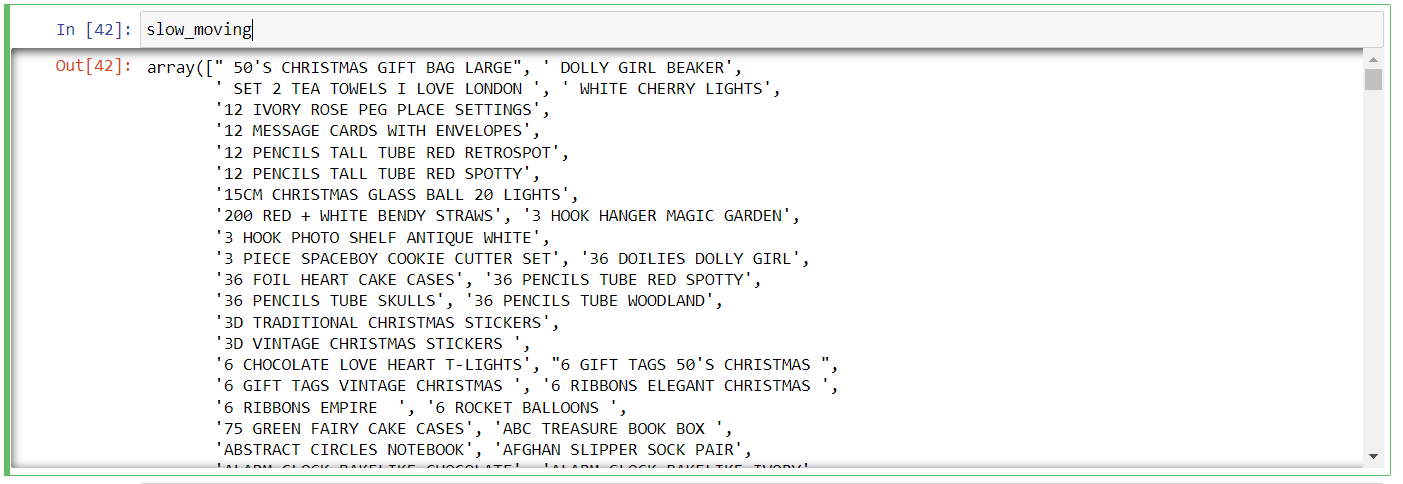

In [43]:
len(slow_moving)

660

In [44]:
rules["antecedents"] = rules["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules["consequents"] = rules["consequents"].apply(lambda x: list(x)[0]).astype("unicode")

In [45]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
517,POPPY'S PLAYHOUSE LIVINGROOM,POPPY'S PLAYHOUSE KITCHEN,0.010331,0.016660,0.009574,0.926702,55.624660,0.009402,13.415568,0.992274
537,ROSES REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER,0.009953,0.025233,0.009033,0.907609,35.968737,0.008782,10.550416,0.981971
464,ROSES REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER,0.016146,0.025233,0.014415,0.892797,35.381759,0.014008,9.092746,0.987684
458,PINK REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER,0.011521,0.025233,0.010223,0.887324,35.164848,0.009932,8.651055,0.982887
382,POPPY'S PLAYHOUSE LIVINGROOM,POPPY'S PLAYHOUSE KITCHEN,0.012441,0.016660,0.011034,0.886957,53.238989,0.010827,8.698778,0.993578
...,...,...,...,...,...,...,...,...,...,...
420,WHITE HANGING HEART T-LIGHT HOLDER,VICTORIAN GLASS HANGING T-LIGHT,0.132197,0.038999,0.009980,0.075491,1.935700,0.004824,1.039471,0.557029
139,WHITE HANGING HEART T-LIGHT HOLDER,HANGING HEART ZINC T-LIGHT HOLDER,0.132197,0.030859,0.009953,0.075286,2.439715,0.005873,1.048045,0.680012
319,WHITE HANGING HEART T-LIGHT HOLDER,LUNCH BAG SPACEBOY DESIGN,0.132197,0.050683,0.009817,0.074264,1.465258,0.003117,1.025472,0.365897
79,WHITE HANGING HEART T-LIGHT HOLDER,COOK WITH WINE METAL SIGN,0.132197,0.033130,0.009249,0.069967,2.111869,0.004870,1.039608,0.606688


In [46]:
rules[rules.consequents.isin(slow_moving)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
517,POPPY'S PLAYHOUSE LIVINGROOM,POPPY'S PLAYHOUSE KITCHEN,0.010331,0.016660,0.009574,0.926702,55.624660,0.009402,13.415568,0.992274
382,POPPY'S PLAYHOUSE LIVINGROOM,POPPY'S PLAYHOUSE KITCHEN,0.012441,0.016660,0.011034,0.886957,53.238989,0.010827,8.698778,0.993578
516,POPPY'S PLAYHOUSE LIVINGROOM,POPPY'S PLAYHOUSE BEDROOM,0.011034,0.015037,0.009574,0.867647,57.700090,0.009408,7.441941,0.993633
378,POPPY'S PLAYHOUSE BEDROOM,POPPY'S PLAYHOUSE KITCHEN,0.015037,0.016660,0.012765,0.848921,50.955924,0.012515,6.508775,0.995342
380,POPPY'S PLAYHOUSE LIVINGROOM,POPPY'S PLAYHOUSE BEDROOM,0.012441,0.015037,0.010331,0.830435,55.225407,0.010144,5.808755,0.994262
519,POPPY'S PLAYHOUSE LIVINGROOM,POPPY'S PLAYHOUSE BEDROOM,0.012441,0.012765,0.009574,0.769565,60.285326,0.009415,4.284226,0.995801
379,POPPY'S PLAYHOUSE KITCHEN,POPPY'S PLAYHOUSE BEDROOM,0.016660,0.015037,0.012765,0.766234,50.955924,0.012515,4.213452,0.996985
518,POPPY'S PLAYHOUSE BEDROOM,POPPY'S PLAYHOUSE LIVINGROOM,0.012765,0.012441,0.009574,0.750000,60.285326,0.009415,3.950237,0.996128
381,POPPY'S PLAYHOUSE BEDROOM,POPPY'S PLAYHOUSE LIVINGROOM,0.015037,0.012441,0.010331,0.687050,55.225407,0.010144,3.155649,0.996883
383,POPPY'S PLAYHOUSE KITCHEN,POPPY'S PLAYHOUSE LIVINGROOM,0.016660,0.012441,0.011034,0.662338,53.238989,0.010827,2.924694,0.997841


* This analysis can be used to provide discount for combined purchase and other offers on slow moving items. 

#### References

* https://towardsdatascience.com/a-gentle-introduction-on-market-basket-analysis-association-rules-fa4b986a40ce 
* https://www.udemy.com/course/ra-retail-customer-analytics-and-trade-area-modeling/ 